In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [33]:
n = 50

In [34]:
random.seed(1)

### Original Model

In [35]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [36]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum1 = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum1 = sum1 + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum1)
    #print("Theory: ",npad,eval[npad])
  

In [37]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.500900
Expectation value for n = 2 is 1.836400
Expectation value for n = 3 is 2.077400
Expectation value for n = 4 is 2.286100
Expectation value for n = 5 is 2.457800
Expectation value for n = 6 is 2.580900
Expectation value for n = 7 is 2.719300
Expectation value for n = 8 is 2.827100
Expectation value for n = 9 is 2.937900
Expectation value for n = 10 is 3.026300
Expectation value for n = 11 is 3.112800
Expectation value for n = 12 is 3.172100
Expectation value for n = 13 is 3.246400
Expectation value for n = 14 is 3.298400
Expectation value for n = 15 is 3.391100
Expectation value for n = 16 is 3.469200
Expectation value for n = 17 is 3.512800
Expectation value for n = 18 is 3.529600
Expectation value for n = 19 is 3.583100
Expectation value for n = 20 is 3.642400
Expectation value for n = 21 is 3.695700
Expectation value for n = 22 is 3.720600
Expectation value for n = 23 is 3.770700
Expectation value for n = 

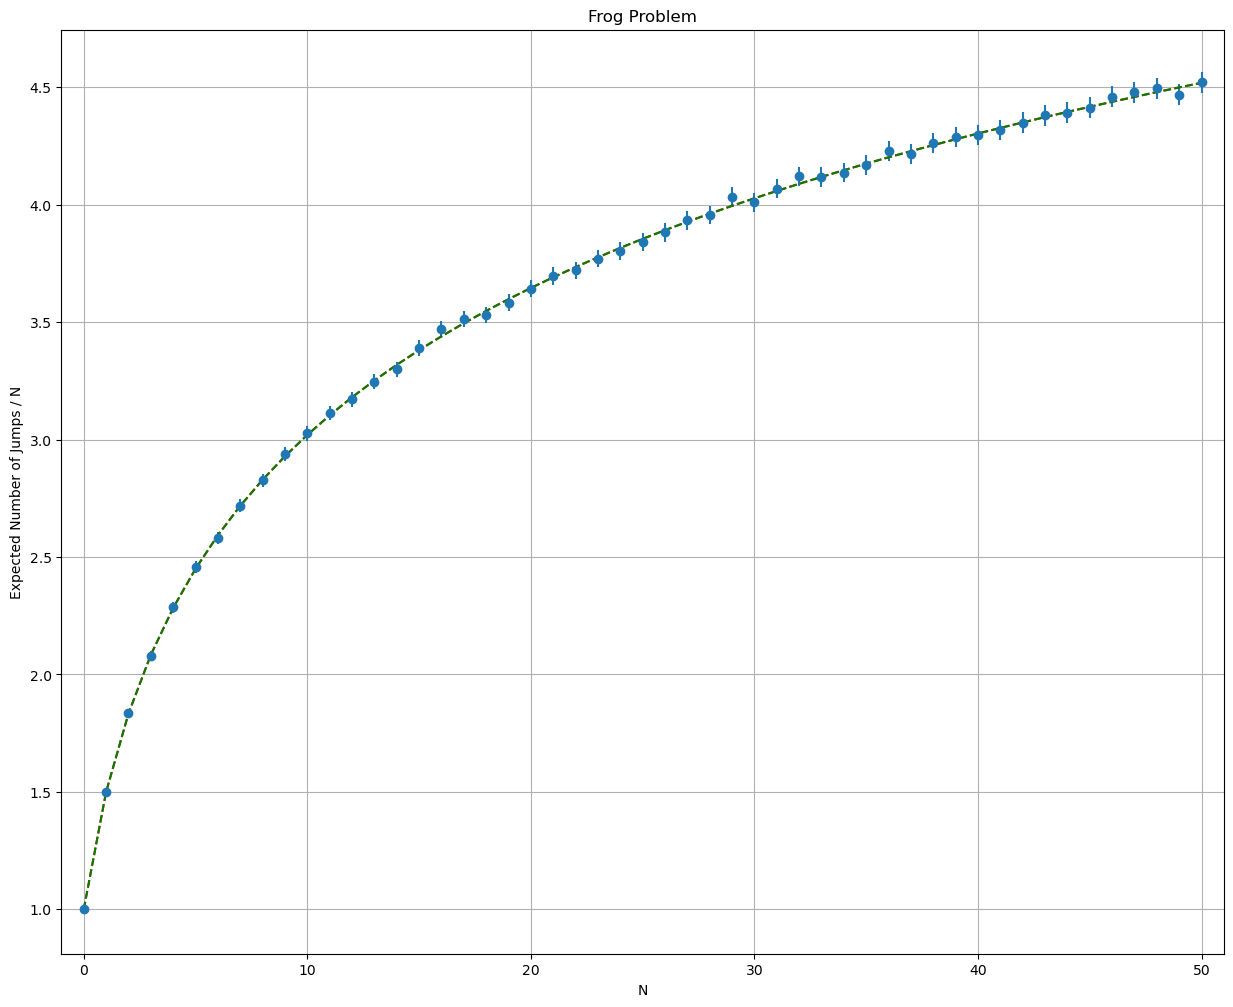

In [38]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')


### Assignment 5 Q1.a

Making frogger able to go backwards as well:
This can easily be done by just allowing him to choose a random position every jump.

The theory is also very simple. Because he can move anywhere, he always has a $\frac{1}{NumPads + 1}$ chance of jumping to the end.
Because of this, the expected average number of jumps will just be NumPads + 1.

In [39]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [40]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    eval.append(npad + 1)

In [41]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#

# n = 100

for npad in range(0,n+1):
    
    x.append(npad)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size from beginning to end
            jump = current_paddle
            while jump == current_paddle:
                jump = int(random.uniform(0,end + 1))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle =  jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.979100
Expectation value for n = 2 is 3.017700
Expectation value for n = 3 is 3.993900
Expectation value for n = 4 is 5.044100
Expectation value for n = 5 is 6.049200
Expectation value for n = 6 is 6.964200
Expectation value for n = 7 is 7.897300
Expectation value for n = 8 is 9.043700
Expectation value for n = 9 is 10.214000
Expectation value for n = 10 is 10.937300
Expectation value for n = 11 is 12.021300
Expectation value for n = 12 is 13.086800
Expectation value for n = 13 is 13.855900
Expectation value for n = 14 is 14.880200
Expectation value for n = 15 is 15.948500
Expectation value for n = 16 is 17.143300
Expectation value for n = 17 is 18.299100
Expectation value for n = 18 is 18.921100
Expectation value for n = 19 is 20.124000
Expectation value for n = 20 is 21.151400
Expectation value for n = 21 is 21.842100
Expectation value for n = 22 is 23.201800
Expectation value for n = 23 is 24.014200
Expectation

In [42]:
print(len(x), len(y))
print(len(eval))

51 51
51


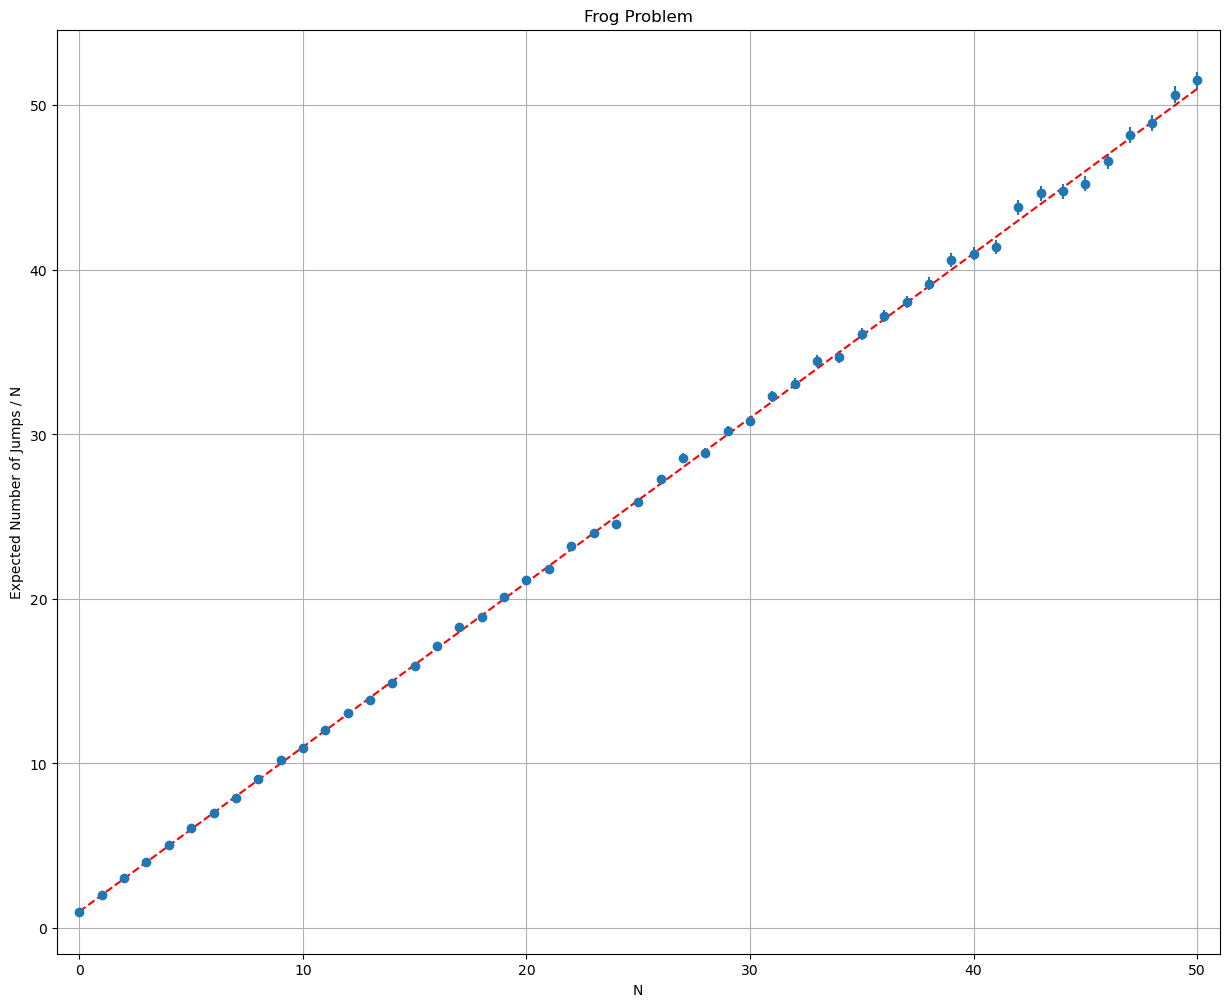

In [43]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')


### Forward and Backward Analysis

This is a much different distribution than before. This makes sense because in the last model, we had to make progress every jump. We had a maximum number of jumps that was equal to the number of lilypads + 1. Now that we can go backwards, there is no more maximum. Every jump takes us to a completely random loctation. Only one of these locations is the end so the probability of reaching the end each jump is constant and does not depend on any jumps prior. The theory I described above matches the results perfectly.

### Assignment 5 Q1.b

Add a probability distribution inversely proportional to the distance of the jump:
This is easily done with the numpy random choice function. It takes in a list of options and a list of probabilities and will use the probabilities to choose from the options.
The options will be the available jumps, and the probabilities will be 1 over the distance then normalized.


In [44]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [45]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum1 = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum1 = sum1 + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum1)
    #print("Theory: ",npad,eval[npad])
  

In [46]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            choices = range(1, end-current_paddle+1)
            probs = [1/i for i in choices]
            probs = np.array(probs) / sum(probs)
            jump = np.random.choice(choices, p=probs)
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.666200
Expectation value for n = 2 is 2.183800
Expectation value for n = 3 is 2.601900
Expectation value for n = 4 is 2.987100
Expectation value for n = 5 is 3.275000
Expectation value for n = 6 is 3.577100
Expectation value for n = 7 is 3.838400
Expectation value for n = 8 is 4.060500
Expectation value for n = 9 is 4.295400
Expectation value for n = 10 is 4.496000
Expectation value for n = 11 is 4.707200
Expectation value for n = 12 is 4.932000
Expectation value for n = 13 is 5.065300
Expectation value for n = 14 is 5.233100
Expectation value for n = 15 is 5.370100
Expectation value for n = 16 is 5.512000
Expectation value for n = 17 is 5.673400
Expectation value for n = 18 is 5.818300
Expectation value for n = 19 is 5.947500
Expectation value for n = 20 is 6.022100
Expectation value for n = 21 is 6.204600
Expectation value for n = 22 is 6.301300
Expectation value for n = 23 is 6.436200
Expectation value for n = 

In [47]:
print(len(x), len(y))
print(len(eval))

51 51
51


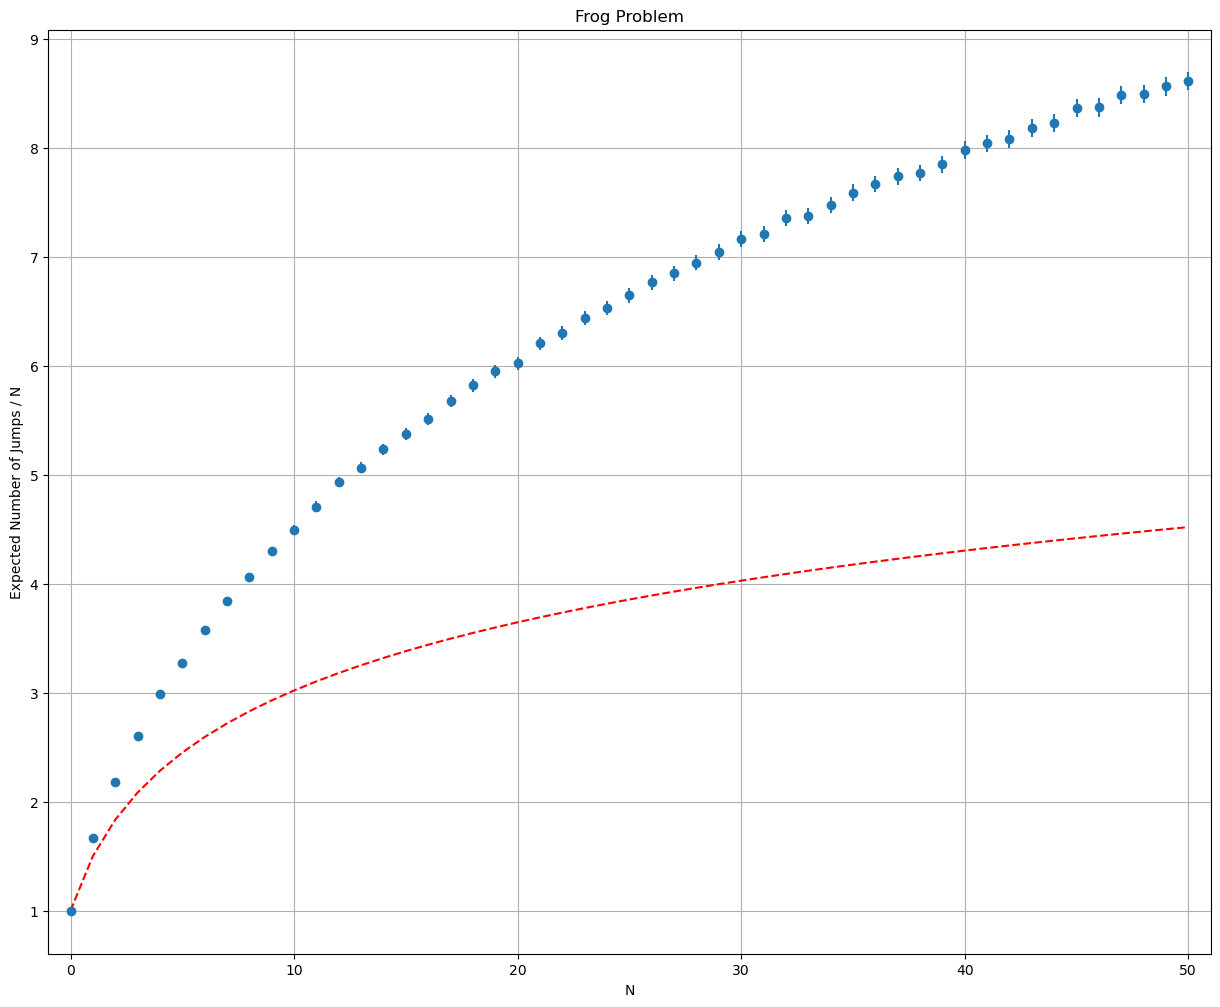

In [48]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')


### With Nonuniform Probability Distribution Analysis

Now that we discourage longer jumps, we can expect the average number of jumps needed to increase. 
We still have this theoretical maximum number of jumps because we can only go forward.

Comparing the results of this model to the original model, we see a similar behaviour just higher numbers. This matches our predictions and makes logical sense. We made the frog favor jumping shorter distances, so it will need to jump more times to reach the end.